In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing import image


In [ ]:
train_dir='/content/drive/MyDrive/dataset/train'
val_dir='/content/drive/MyDrive/dataset/test'

In [ ]:
batch_size = 32
img_height = 250
img_width = 250
train_data=tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_data=tf.keras.preprocessing.image_dataset_from_directory(
  val_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 700 files belonging to 2 classes.
Found 317 files belonging to 2 classes.


In [ ]:
class_names=train_data.class_names

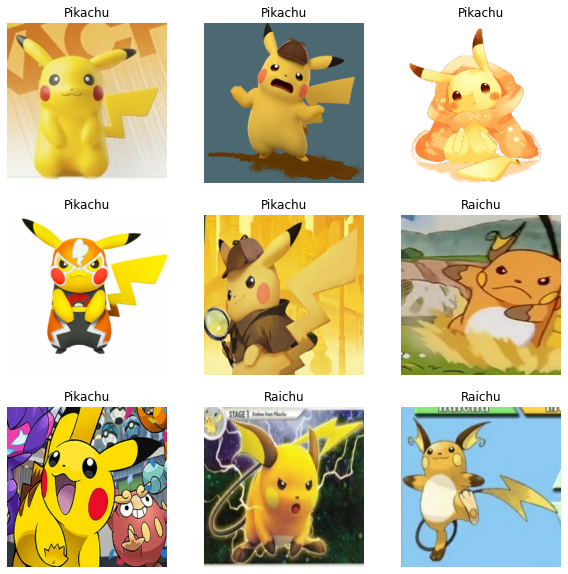

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
num_classes = 2

# defining model
model = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),                         
    tf.keras.layers.Conv2D(32, (5,5), activation = 'relu'),
    tf.keras.layers.MaxPool2D(3,3),
    tf.keras.layers.Conv2D(64, (5,5) , activation = 'relu'),
    tf.keras.layers.MaxPool2D((3,3)),
    tf.keras.layers.Conv2D(128 , (5,5) , activation = 'relu'),
    tf.keras.layers.MaxPool2D((3,3)),
    tf.keras.layers.Conv2D(256 , (5,5) , activation = 'relu'),
    tf.keras.layers.MaxPool2D(3,3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5, seed = 5),
    tf.keras.layers.Dense(128 , activation = 'relu'),
    tf.keras.layers.Dense(num_classes , activation = 'sigmoid')])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 250, 250, 3)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 246, 246, 32)      2432      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 82, 82, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 78, 78, 64)        51264     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 22, 22, 128)       204928    
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7, 7, 128)        

In [ ]:
history = model.fit(train_data,validation_data=val_data,epochs=5)

Epoch 1/5
22/22 [==============================] - 126s 6s/step - loss: 0.6987 - accuracy: 0.5678 - val_loss: 0.6177 - val_accuracy: 0.6814
Epoch 2/5
22/22 [==============================] - 9s 307ms/step - loss: 0.5632 - accuracy: 0.7356 - val_loss: 0.5055 - val_accuracy: 0.7729
Epoch 3/5
22/22 [==============================] - 9s 307ms/step - loss: 0.4989 - accuracy: 0.7914 - val_loss: 0.4604 - val_accuracy: 0.7950
Epoch 4/5
22/22 [==============================] - 9s 304ms/step - loss: 0.4214 - accuracy: 0.8407 - val_loss: 0.4626 - val_accuracy: 0.7823
Epoch 5/5
22/22 [==============================] - 9s 302ms/step - loss: 0.4604 - accuracy: 0.8080 - val_loss: 0.4000 - val_accuracy: 0.8202


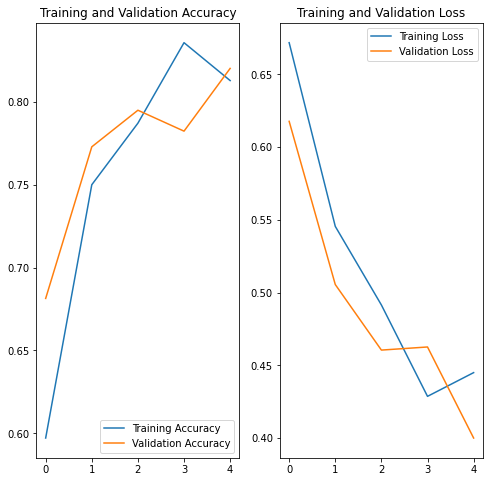

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(5)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

This image most likely belongs to Pikachu with a 59.82 percent confidence.




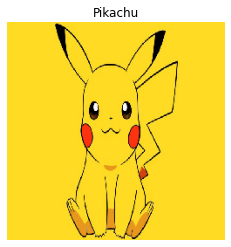

In [ ]:
test_path = '/content/drive/MyDrive/dataset/check/001.jpg'
img = tf.keras.preprocessing.image.load_img(
    test_path, target_size=(img_height, img_width)
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)
print("\n")
plt.title(class_names[np.argmax(score)])
plt.axis('off')
_=plt.imshow(img)